# 最小二乘法实现线性回归

本文主要讨论线性回归中的最小二乘法。使用的数据集是boston房价，具有多个特征。

## 最小二乘法原理
设$(x,y)$是一对观测量，且$x=[x_1,\cdots,x_n]^{T} \in R^{n}, y \in R$满足以下的理论函数：
$$ y=f(x,\omega).$$ 其中$\omega = [\omega_1,\cdots,\omega_n]^{T} $为待定参数。

为了寻找函数$ y=f(x,\omega)$的参数$\omega$的最优估计值，对于给定$m$组（通常$m>n$）观测数据$(x_i,y_i),i=1,\cdots,m.$ 求解目标函数$$L(y,f(x,\omega)) = \sum^{m}_{i=1}[y_i - f(x_i,\omega_i)]^{2}.$$ 

取最小值的参数$\omega_i$. 求解的这类问题称为最小二乘问题，求解该问题的方法的几何语言称为最小二乘拟合。

最小二乘法是有解的。算法中直接使用解的公式。

## 参考
* 算法：https://www.bilibili.com/video/BV1V7411P7wL
* 原理：https://baike.baidu.com/item/%E6%9C%80%E5%B0%8F%E4%BA%8C%E4%B9%98%E6%B3%95
* 数据集：https://www.kaggle.com/datasets/kyasar/boston-housing

## 1.数据预处理

本节包括查看数据与清洗数据，做好数据在训练和预测前的准备。

In [8]:
import numpy as np
import pandas as pd

In [9]:
data = pd.read_csv('/data/boston_housing.csv')
data.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


### 关于数据集特征的简单说明：
* CRIM：房屋所在镇的犯罪率
* ZN：面积大于25k平方英尺住宅所占的比例
* INDUS：房屋所在镇非零售区域所占比例
* CHAS：房屋是否位于河边，若是则为1
* NOX：一氧化氮浓度
* RM：平均房间数量
* AGE：1940年前建成房屋所占比例
* DIS：房屋距离波士顿五大就业中心的加权距离
* TAX：财产税额度
* PTRATIO：房屋所在镇师生比例
* B：B =1000*(房屋所在镇非美籍人口所在比例-0.63)^2
* LATAT：弱势群体人口所占比例
* MEDV：房屋的平均价格

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [11]:
data.duplicated().any()

False

## 2.最小二乘法

In [12]:
class LinearRegression:
    
    def fit(self, X, y):
        # 如果X不是矩阵，而是矩阵的一部分，通过copy，避免转换矩阵时候失败
        X = np.asmatrix(X.copy())
        y = np.asmatrix(y).reshape(-1,1) # y是一维,不用copy了,reshape定下来列为1，-1表示自动计算
        self.w_ = (X.T * X).I * X.T * y        
        
    def predict(self, X):
        X = np.asmatrix(X.copy())
        result = X * self.w_
        return np.array(result).ravel()  #ravel可以把矩阵拉直

## 3.1划分训练验证集，训练和预测

In [13]:
data.shape

(506, 14)

In [14]:
t = data.sample(len(data), random_state = 0)
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]

In [18]:
lr = LinearRegression()
lr.fit(train_X, train_y)
result = lr.predict(test_X)
display(np.mean((result-test_y) ** 2))

17.011905533634945

In [19]:
display(lr.w_)

matrix([[-9.32859692e-02],
        [ 4.39664692e-02],
        [ 5.72354432e-03],
        [ 2.41509608e+00],
        [-3.31988921e+00],
        [ 5.59119871e+00],
        [-2.18905524e-03],
        [-8.57221736e-01],
        [ 2.28120616e-01],
        [-1.18896061e-02],
        [-2.52710238e-01],
        [ 1.49077626e-02],
        [-4.56116634e-01]])

## 3.2考虑截距的划分、训练和预测

In [24]:
t1 = data.sample(len(data), random_state = 0)

new_columns = t1.columns.insert(0,'Intercept') # 最前面插入一列全为1,这行是实现在最前面
t1 = t1.reindex(columns = new_columns, fill_value = 1)
t1

,Intercept,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
329,1,0.06724,0.0,3.24,0,0.460,6.333,17.2,5.2146,4,430.0,16.9,375.21,7.34,22.6
371,1,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666.0,20.2,366.15,9.53,50.0
219,1,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276.0,16.4,393.74,10.50,23.0
403,1,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666.0,20.2,396.90,19.77,8.3
78,1,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398.0,18.7,386.40,12.34,21.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,1,0.28392,0.0,7.38,0,0.493,5.708,74.3,4.7211,5,287.0,19.6,391.13,11.74,18.5
192,1,0.08664,45.0,3.44,0,0.437,7.178,26.3,6.4798,5,398.0,15.2,390.49,2.87,36.4
117,1,0.15098,0.0,10.01,0,0.547,6.021,82.6,2.7474,6,432.0,17.8,394.51,10.30,19.2
47,1,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233.0,17.9,392.74,18.80,16.6


In [26]:
train_X1 = t1.iloc[:400, :-1]
train_y1 = t1.iloc[:400, -1]
test_X1 = t1.iloc[400:, :-1]
test_y1 = t1.iloc[400:, -1]
lr1 = LinearRegression()
lr1.fit(train_X1, train_y1)
result1 = lr1.predict(test_X1)
display(np.mean((result1-test_y1) ** 2))
display(lr1.w_)

17.097531384667427

matrix([[ 4.00542166e+01],
        [-1.10490198e-01],
        [ 4.11074548e-02],
        [ 1.14986147e-02],
        [ 2.03209693e+00],
        [-1.95402764e+01],
        [ 3.28900304e+00],
        [ 6.91671720e-03],
        [-1.39738261e+00],
        [ 3.78327573e-01],
        [-1.54938397e-02],
        [-8.64470498e-01],
        [ 8.29999966e-03],
        [-5.66991979e-01]])

## 4.可视化展示

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

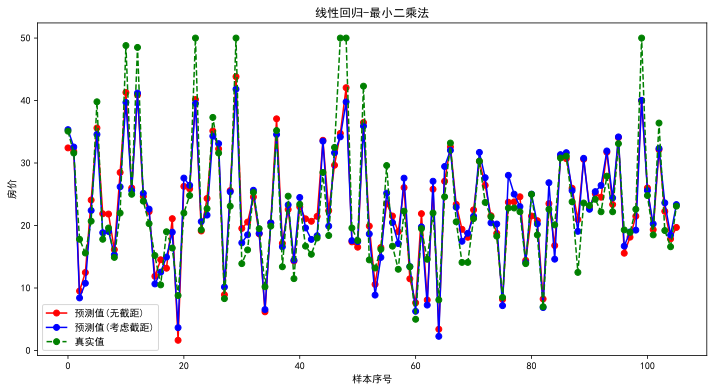

In [34]:
plt.figure(figsize = (12,6))
plt.plot(result,'ro-', label='预测值(无截距)')
plt.plot(result1,'bo-', label='预测值(考虑截距)')
plt.plot(test_y.values,'go--', label = '真实值')
plt.title('线性回归-最小二乘法')
plt.xlabel('样本序号')
plt.ylabel('房价')
plt.legend()
plt.show()